# Stanford Stats 191

## Introduction

This is a re-creation of the Stanford Stats 191 course (https://web.stanford.edu/class/stats191/), using Python eco-system tools, instead of R.  This the lecture "Course introduction and review" (see https://web.stanford.edu/class/stats191/notebooks/Review.html).

I found the STATS191 course pitched at just the right level for me (who can dimly remember my Uni stats courses).  The only drawback was that all the examples were in R, not Python.  So I decided to redo the course material using Python eco-system tools.

## Why Python?

I have tried to get into R a number of times, and bounced hard each time.  Part of it was that I was learning R because "I should learn R", not because I had a specific project in mind.  On the other hand, I learnt Python implementing a specific application that took me a few months to complete.

Further, I found the syntax of R to be sufficiently different to be jarring (e.g. left and right assignment statements).  Most modern computer languages have a syntax largely based on C  (the Proto-Indo-European of programming), but not R, and I think that might make it harder for experienced programmers to pick up.  Further, the tidy-verse religious wars (and the introduction of things like the pipe operator) indicates to me that I probably can't pick R by idle tinkering.

I think there is a deeper reason for this: R is for statisticians, by statisticians, while Python is for software engineers, by software engineers.  Of course Python has surprises/ gotchas (I'm look at you, mutable function parameter defaults), but I found R to have many more.

There is an argument that eventually general purposes computers /languages will win out over domain-specific computers /languages.  Certainly I have used Python for a variety of tasks (generating Word Documents hold thumbnails of images in a directory, playing legal chess, visualizing geospatial data, processing web-cam images, etc) that I wouldn't have the first idea how to do in R.  Part of the strength of Python is that it comes "batteries included";  there is an amazing amount of open-source software that supports almost any task.  Part of this current project (redo STATS191) is to see if there is any limit to Python's statistics support (spoiler alert: haven't found any yet, but seeing as how I am on the beginner slopes, I wouldn't expect there to be any limits).


-----
## Initial Notebook Setup

```watermake``` documents the Python and package environment, ```black``` is my preferred formatter, and we want graphs, etc visible in the Notebook

In [39]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [40]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [41]:
%matplotlib inline

All imports go here

*  pandas handles high-level datatable structures

* numpy handle numeric data and algorithms

* seaborn handles vizualization

The statistics support in Python comes from two packages.  the ```stats``` sub-module of ```scipy```, and ```statsmodels```; we mostly use the latter.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sn

import math

import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.formula.api import rlm
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import (
    wls_prediction_std,
)

from statsmodels.stats.stattools import jarque_bera

-----
## Data Load

Load the initial data set (Mother-Daughter height data), and explore it in different ways.

In [43]:
DATA_PREFIX = 'd:/StanfordStats191/alr3data/'

data = pd.read_csv(DATA_PREFIX + 'heights.txt', sep=' ')

### Pandas visualization

We print and graph the data in different ways.

In [44]:
data.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [45]:
data.describe()

,Mheight,Dheight
count,1375.000000,1375.000000
mean,62.452800,63.751055
std,2.355103,2.600053
min,55.400000,55.100000
25%,60.800000,62.000000
50%,62.400000,63.600000
75%,63.900000,65.600000
max,70.800000,73.100000


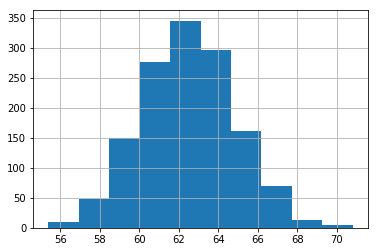

In [46]:
data['Mheight'].hist()

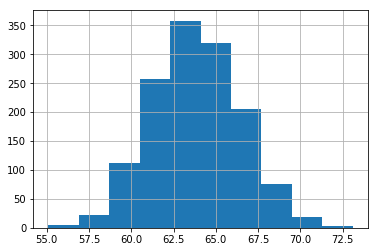

In [47]:
data['Dheight'].hist()

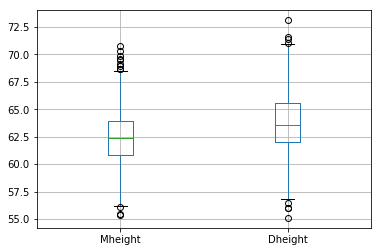

In [48]:
data.boxplot(column=['Mheight', 'Dheight'])

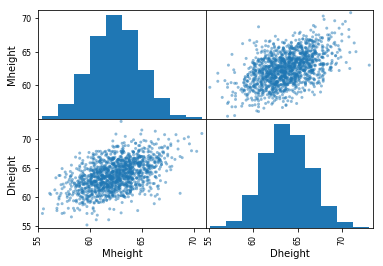

In [49]:
__ = pd.plotting.scatter_matrix(
    data[['Mheight', 'Dheight']]
)

### Matplotlib graphics

The pandas graphics can be improved upon, but with more code.  First we use matplotlib, and using seaborn.

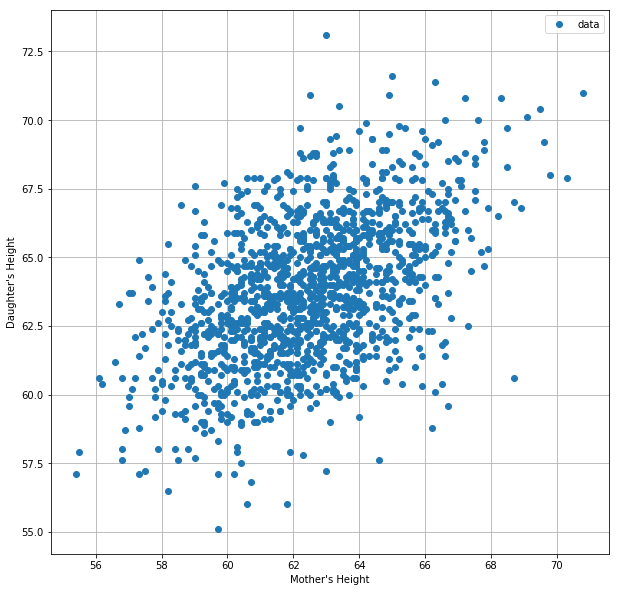

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(data['Mheight'], data['Dheight'], 'o', label='data')
ax.grid()
ax.set_xlabel("Mother's Height")
ax.set_ylabel("Daughter's Height")

ax.legend(loc='best')

### Seaborn graphics

We generate some seaborn graphics with minimal code.

D:\Anaconda3\envs\ac5-py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


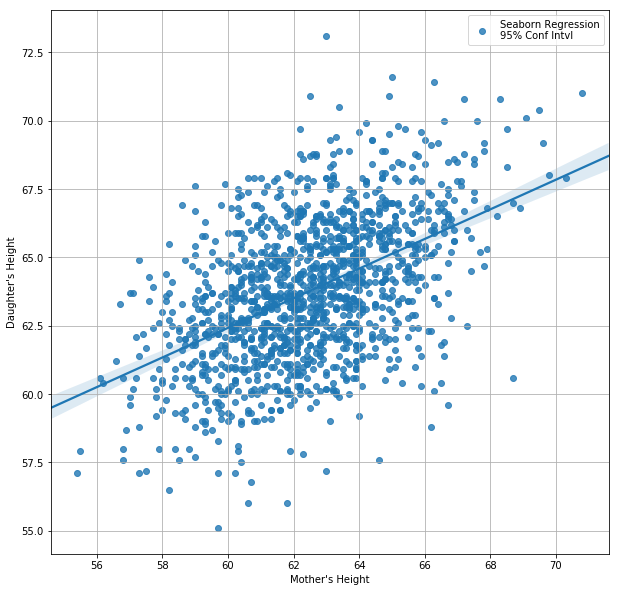

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

sn.regplot(
    'Mheight',
    'Dheight',
    data=data,
    ax=ax,
    label='Seaborn Regression\n95% Conf Intvl',
)
ax.grid()
ax.set_xlabel("Mother's Height")
ax.set_ylabel("Daughter's Height")

ax.legend(loc='best')

Note: Seaborn ```jointplot``` graphics cannot be incorporated easily into Matplotlib figures

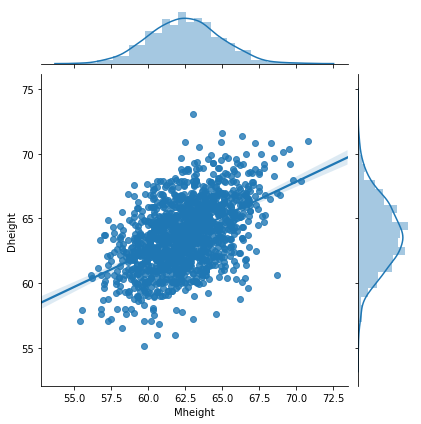

In [52]:
# fig, ax = plt.subplots(figsize=(10, 10))

g = sn.jointplot(
    'Mheight',
    'Dheight',
    kind='reg',
    data=data,
    # ax=ax,
    label='Seaborn Regression\n95% Conf Intvl',
)

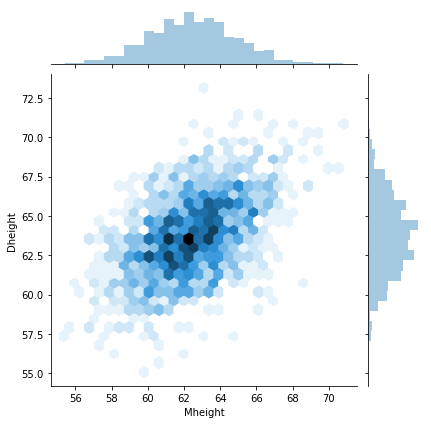

In [53]:
g = sn.jointplot(
    'Mheight',
    'Dheight',
    kind='hex',
    data=data,
    # ax=ax,
    label='Seaborn Regression\n95% Conf Intvl',
)

-----
## Statistics Models

So now having done our data exploration and initial visualization, we might be of the view that there is a linear relationship between a mothers height, and her daughter's height.  

We test this hypothesis, by using Ordinary Least Squares to fit a line to the data.  ```statsmodels``` has two modes: one where you build your input data matrixes explicitly (and you use the UPPER CASE variants of the class names), and one where you can text formulas a la R (and you use lower case variants of the class names).

In [54]:
data = pd.read_csv(DATA_PREFIX + 'heights.txt', sep=' ')

daughter = data['Dheight']
mother = data['Mheight']

mother = sm.add_constant(mother)

res = sm.OLS(daughter, mother).fit()

We can see from the RegressionResults summary method below, the linear model doesn't explain much of the spread in the daughter's heights (R^2 = 0.241), but the likelihood of seeing these results if  daughters heights had no relation to mothers heights is vanishingly small.  Thus we reject the hypothesis that daughters  heights have no relation to mothers heights

In [55]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           3.22e-84
Time:                        16:12:10   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We display the line of best (OLS) fit.  Note we set ```alpha``` to be less than default, so that the density of data points is more easily assessed.

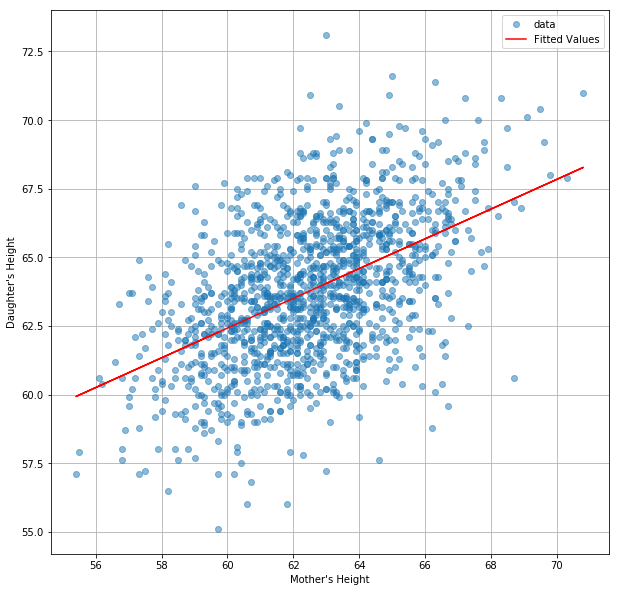

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(
    data['Mheight'],
    data['Dheight'],
    'o',
    label='data',
    alpha=0.5,
)
ax.plot(
    data['Mheight'],
    res.fittedvalues,
    'r-',
    label='Fitted Values',
)
ax.grid()
ax.set_xlabel("Mother's Height")
ax.set_ylabel("Daughter's Height")

ax.legend(loc='best')

If we want to add some context the graph, we can add Confidence Intervals.  First, we can be very confident about the line of best fit (due to the large number of data points averaging out the ).  However, any prediction we make using this line will have the inherent error of our model, so the confidence interval for  predictions is much wider. 

Note that the ```wls_prediction_std``` method we call comes from a ```statsmodels``` sandbox:

> This sandbox contains code that is for various reasons not ready to be included in statsmodels proper. It contains modules from the old stats.models code that have not been tested, verified and updated to the new statsmodels structure: cox survival model, mixed effects model with repeated measures, generalized additive model and the formula framework. The sandbox also contains code that is currently being worked on until it fits the pattern of statsmodels or is sufficiently tested.

We can only hope that this call won't disappear in the future!

In [57]:
x_ci = np.linspace(
    data['Mheight'].min(), data['Mheight'].max(), 20
)
x_ci_enh = sm.add_constant(x_ci)

gp = res.get_prediction(x_ci_enh)
ci = gp.conf_int(alpha=0.05)
upper = [z[1] for z in ci]
lower = [z[0] for z in ci]

In [58]:
prstd, iv_l, iv_u = wls_prediction_std(res)

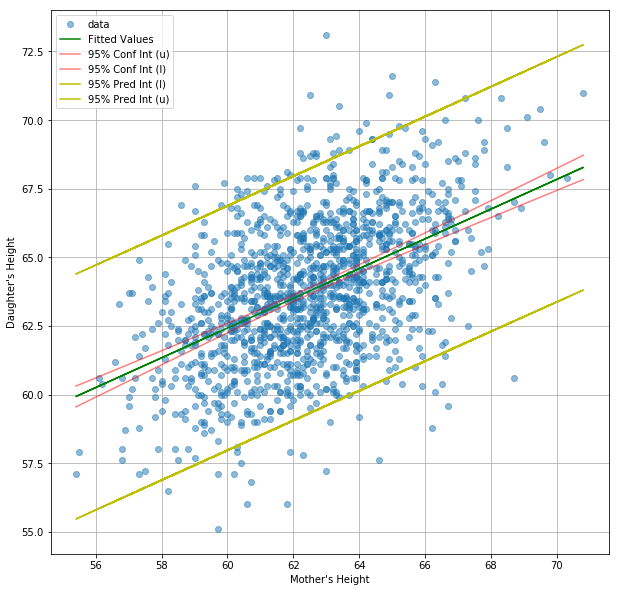

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(
    data['Mheight'],
    data['Dheight'],
    'o',
    label='data',
    alpha=0.5,
)
ax.plot(
    data['Mheight'],
    res.fittedvalues,
    'g-',
    label='Fitted Values',
)

ax.plot(
    x_ci, upper, 'r-', label='95% Conf Int (u)', alpha=0.5
)
ax.plot(
    x_ci, lower, 'r-', label='95% Conf Int (l)', alpha=0.5
)

ax.plot(
    data['Mheight'], iv_l, 'y-', label='95% Pred Int (l)'
)
ax.plot(
    data['Mheight'], iv_u, 'y-', label='95% Pred Int (u)'
)

ax.grid()
ax.set_xlabel("Mother's Height")
ax.set_ylabel("Daughter's Height")

ax.legend(loc='best')

----
### Use Symbolic Model Specification

We can also use R-style symbolic model specification (that assumes a constant term in the linear model, by default).  We get the same result, comparing the two summary() method calls.

In [60]:
res2 = ols('Dheight ~ Mheight', data=data).fit()

In [61]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           3.22e-84
Time:                        16:12:11   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           3.22e-84
Time:                        16:12:11   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Just to make sure we understand the outputs, we compute the R^2 values manually

In [63]:
mean_y = data['Dheight'].mean()

sstot = sum([(y - mean_y) ** 2 for y in data['Dheight']])

print(f'Total sum of squares around the mean {sstot}')

Total sum of squares around the mean 9288.615970909108


In [64]:
ssreg = sum([(y1 - mean_y) ** 2 for y1 in res.fittedvalues])

ssres = sum(
    [
        (y1 - y2) ** 2
        for y1, y2 in zip(data['Dheight'], res.fittedvalues)
    ]
)

In [65]:
print(
    f'Total sum of square spread around mean {sstot},\n'
    + f'sum of square errors, predictions around mean {ssreg}, \n'
    + f'sum of square errors, predictions against actual {ssres}'
)

print(ssreg + ssres)

Total sum of square spread around mean 9288.615970909108,
sum of square errors, predictions around mean 2236.6585750284344, 
sum of square errors, predictions against actual 7051.957395880653
9288.615970909088


In [66]:
r2 = 1 - ssres / sstot
r2

0.24079567742206331

In [67]:
print(
    f'res.ssr = {res.ssr}; res.mse_model = {res.mse_model}'
)

res.ssr = 7051.957395880656; res.mse_model = 2236.6585750284357


In [68]:
print(
    f'res.mse_total = {res.mse_total}, se_total = {res.mse_total*(1375-1)}'
)

print(res.centered_tss)

print(
    f'ssres {ssres} =  res.mse_resid {res.mse_resid} * 1373 = {res.mse_resid*1373}'
)

res.mse_total = 6.760273632393807, se_total = 9288.615970909092
9288.615970909092
ssres 7051.957395880653 =  res.mse_resid 5.136167076387951 * 1373 = 7051.957395880656


------
## Multivariate Regression

### Numerical descriptive statistics

We now look at a dataset that links income to RightToWorkLaws (or more accurately, RightToFireWithoutPeskyUnions), in a number of USA cities.  In STATS191, it is used as example to illustrate numerical descriptive statistics.  The pandas ```describe()``` method gives us these.

In [69]:
DATA_PREFIX = 'd:/StanfordStats191/'

rtw = pd.read_csv(DATA_PREFIX + 'P005.txt', sep='\t')

In [70]:
rtw.head()

,City,COL,PD,URate,Pop,Taxes,Income,RTWL
0,Atlanta,169,414,13.6,1790128,5128,2961,1
1,Austin,143,239,11.0,396891,4303,1711,1
2,Bakersfield,339,43,23.7,349874,4166,2122,0
3,Baltimore,173,951,21.0,2147850,5001,4654,0
4,Baton Rouge,99,255,16.0,411725,3965,1620,1


The variables are:

- Income: income for a four-person family

- COL: cost of living for a four-person family

- PD: Population density

- URate: rate of unionization in 1978

- Pop: Population

- Taxes: Property taxes in 1972

- RTWL: right-to-work indicator

Note the method used to change the color of the boxplot boxes.  We display a few more pandas graphs for this dataset.

Text(0, 0.5, 'Cost Of Living')

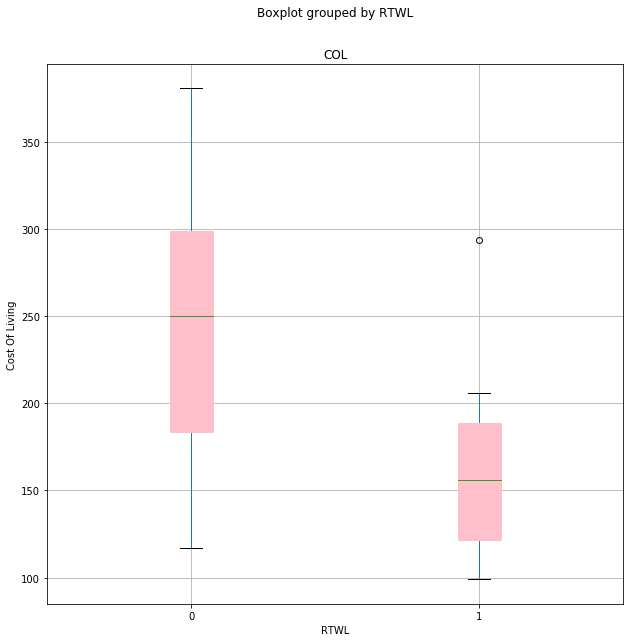

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

props = dict(boxes="Pink")
rtw.boxplot(
    column=['COL'],
    by='RTWL',
    ax=ax,
    color=props,
    patch_artist=True,
)
ax.set_ylabel("Cost Of Living")

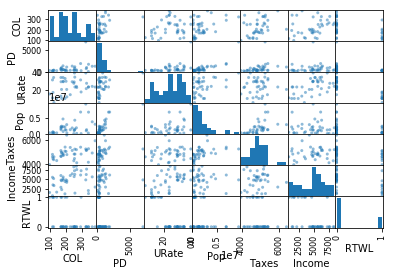

In [72]:
__ = pd.plotting.scatter_matrix(
    rtw[
        [
            'City',
            'COL',
            'PD',
            'URate',
            'Pop',
            'Taxes',
            'Income',
            'RTWL',
        ]
    ]
)

In [73]:
rtw.describe()

,COL,PD,URate,Pop,Taxes,Income,RTWL
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000
mean,223.631579,780.157895,24.221053,2.040736e+06,4902.815789,4708.763158,0.263158
std,76.506640,1121.935430,8.600036,2.114432e+06,483.829033,2084.042504,0.446258
min,99.000000,43.000000,6.500000,1.623040e+05,3965.000000,782.000000,0.000000
25%,170.750000,302.000000,17.825000,4.970500e+05,4619.750000,3109.500000,0.000000
50%,205.500000,400.000000,24.050000,1.408054e+06,4858.000000,4865.000000,0.000000
75%,266.500000,963.750000,30.000000,2.355462e+06,5166.500000,6081.500000,0.750000
max,381.000000,6908.000000,39.200000,9.561089e+06,6404.000000,8392.000000,1.000000


The ```median()``` method gives us the median of each numeric column.  We really should have declared RTWL a categorical column, but this is what you get by default.

In [74]:
rtw.median()

COL           205.50
PD            400.00
URate          24.05
Pop       1408054.50
Taxes        4858.00
Income       4865.00
RTWL            0.00
dtype: float64

To enhance the default pandas scatterplots, we specify we want RTWL status to be highlighted. It is annoying that we don't get a legend by default.

D:\Anaconda3\envs\ac5-py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


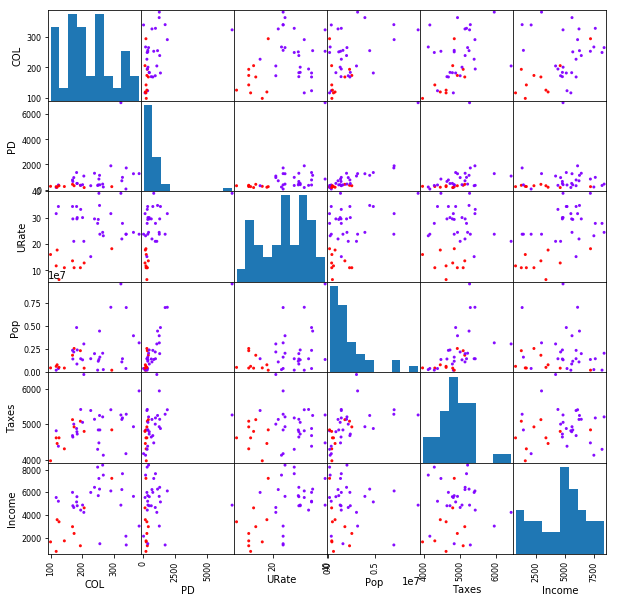

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))

__ = pd.plotting.scatter_matrix(
    rtw[['COL', 'PD', 'URate', 'Pop', 'Taxes', 'Income']],
    c=rtw['RTWL'],
    cmap='rainbow',
    ax=ax,
    alpha=0.95,
)

At least Seaborn knows about legends!

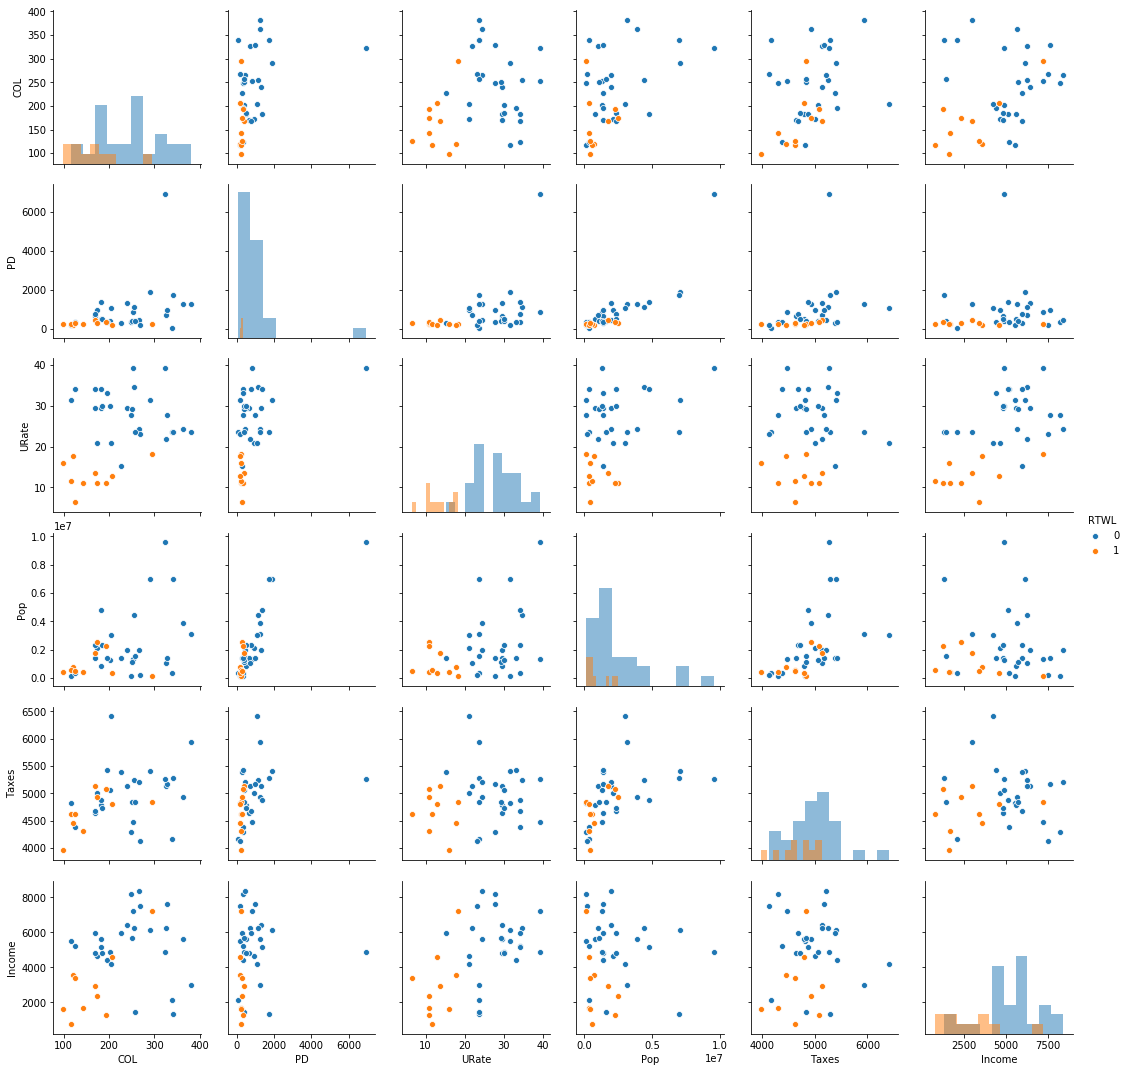

In [76]:
_ = sn.pairplot(
    rtw,
    vars=['COL', 'PD', 'URate', 'Pop', 'Taxes', 'Income'],
    kind='scatter',
    hue='RTWL',
    diag_kind='hist',
    diag_kws={'alpha': 0.5},
)

One of the cities is clearly an outlier: it is New York.

In [77]:
rtw.iloc[26]

City      New York
COL            323
PD            6908
URate         39.2
Pop        9561089
Taxes         5260
Income        4862
RTWL             0
Name: 26, dtype: object

----
## Numerical descriptive statistics analysis

We read data on a treatment / placebo experiment, and try to determine if the observed data supports an hypothesis that the treatment is better than the placebo

### Read data

In [78]:
DATA_PREFIX = 'd:/StanfordStats191/'

cal = pd.read_csv(DATA_PREFIX + 'calcium.txt', sep='\t')

### Initial Analysis

In [79]:
cal.head()

,Treatment,Begin,End,Decrease
0,Calcium,107,100,7
1,Calcium,110,114,-4
2,Calcium,123,105,18
3,Calcium,129,112,17
4,Calcium,112,115,-3


In [80]:
cal.describe()

,Begin,End,Decrease
count,21.000000,21.000000,21.000000
mean,114.047619,112.000000,2.238095
std,9.708121,9.782638,7.687033
min,98.000000,95.000000,-11.000000
25%,109.000000,105.000000,-3.000000
50%,112.000000,114.000000,-1.000000
75%,119.000000,118.000000,7.000000
max,136.000000,133.000000,18.000000


Start to look at difference between Treatment and Placebo.  Seems to be a difference, but could it arise by chance?

In [81]:
cal[cal['Treatment'] == 'Calcium']['Decrease'].mean()

5.0

In [82]:
cal[cal['Treatment'] == 'Placebo']['Decrease'].mean()

-0.2727272727272727

### Visualize difference 

First by overlayed histograms, and then by boxplot.

Text(0.5, 0, 'Decrease in blood pressure')

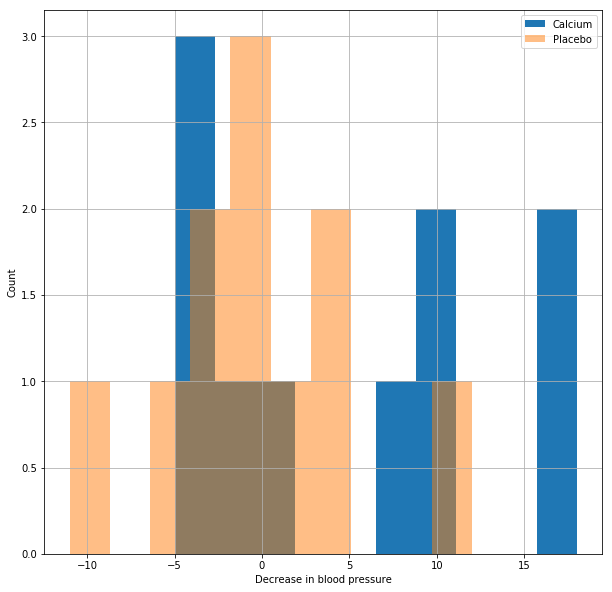

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))
cal[cal['Treatment'] == 'Calcium']['Decrease'].hist(
    ax=ax, label='Calcium'
)
cal[cal['Treatment'] == 'Placebo']['Decrease'].hist(
    ax=ax, label='Placebo', alpha=0.5
)
ax.legend(loc='best')
ax.set_ylabel('Count')
ax.set_xlabel('Decrease in blood pressure')

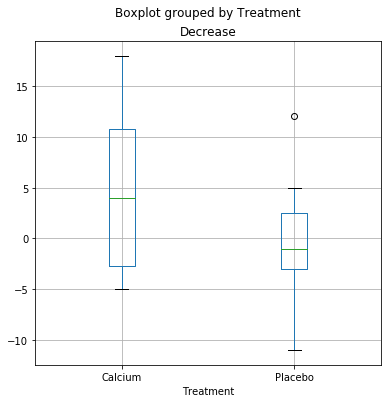

In [84]:
fig, ax = plt.subplots(figsize=(6, 6))
cal.boxplot(column=['Decrease'], by='Treatment', ax=ax)

Compute Means and Mediums for test population as a whole, and then for each treatment group.

In [85]:
mean_decrease = cal['Decrease'].mean()
mean_treated = cal[cal['Treatment'] == 'Calcium'][
    'Decrease'
].mean()
mean_placebo = cal[cal['Treatment'] == 'Placebo'][
    'Decrease'
].mean()

In [86]:
print(mean_decrease, mean_placebo, mean_treated)

2.238095238095238 -0.2727272727272727 5.0


In [87]:
median_decrease = cal['Decrease'].mean()
median_decrease

2.238095238095238

In [88]:
median_treated = cal[cal['Treatment'] == 'Calcium'][
    'Decrease'
].median()
median_treated

4.0

Show the spread of Treatment response by quantiles

In [89]:
sorted(cal[cal['Treatment'] == 'Calcium']['Decrease'])

[-5, -4, -3, -2, 1, 7, 10, 11, 17, 18]

In [90]:
cal[cal['Treatment'] == 'Calcium']['Decrease'].quantile(
    q=[0.25, 0.75]
)

0.25    -2.75
0.75    10.75
Name: Decrease, dtype: float64

Compute the standard deviation of the Treatment response two ways (first manually, second by pandas)

In [91]:
treated = cal[cal['Treatment'] == 'Calcium']['Decrease']
samp_std_dev = sum(
    [(x - mean_treated) ** 2 for x in treated]
) / (len(treated) - 1)

In [92]:
math.sqrt(samp_std_dev)

8.743251365736

In [93]:
cal[cal['Treatment'] == 'Calcium']['Decrease'].std()

8.743251365736

In order to help visualize the difference, we take 200 samples of size 5 from the overall, treated, and placebo populations, and chart the results as histograms. Once again, treatment and placebo seem different.

In [94]:
sampling = [
    sum(
        np.random.choice(
            cal['Decrease'], size=5, replace=True
        )
    )
    / 5
    for i in range(200)
]

sampling_treated = [
    sum(
        np.random.choice(
            cal[cal['Treatment'] == 'Calcium']['Decrease'],
            size=5,
            replace=True,
        )
    )
    / 5
    for i in range(200)
]
sampling_placebo = [
    sum(
        np.random.choice(
            cal[cal['Treatment'] == 'Placebo']['Decrease'],
            size=5,
            replace=True,
        )
    )
    / 5
    for i in range(200)
]

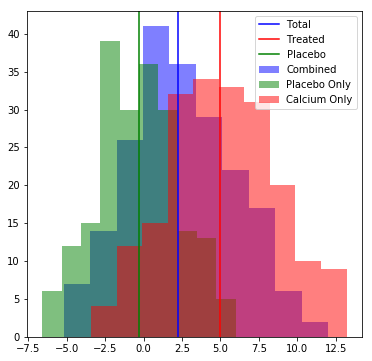

In [95]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(sampling, label='Combined', color='blue', alpha=0.5)


ax.hist(
    sampling_placebo,
    alpha=0.5,
    label='Placebo Only',
    color='green',
)
ax.hist(
    sampling_treated,
    alpha=0.5,
    label='Calcium Only',
    color='red',
)

ax.axvline(mean_decrease, c='blue', label='Total')
ax.axvline(mean_treated, c='red', label='Treated')
ax.axvline(mean_placebo, c='green', label='Placebo')

ax.legend(loc='best')

----
## T Tests

We will use the T Test to compare experimental results.  We run through a contrived example to show the principles.

### Using contrived data

In [96]:
sample = [
    5,
    -1,
    0,
    2,
    6,
    -1,
    5,
    6,
    3,
    3,
    -3,
    -1,
    -2,
    3,
    0,
    4,
    1,
    4,
    6,
    0,
]
print(np.mean(sample), np.std(sample, ddof=1))

2.0 2.8837110593268895


Manually compute the value of the T statistic.  Note we use the sample Sum of Squares / (N-1), (see ```numpy.std```) to give  an unbiased estimator of the variance of the infinite population.

In [97]:
t_value = (np.mean(sample) - 0) / (
    np.std(sample, ddof=1) / math.sqrt(20)
)

In [98]:
t_value

3.1016532953502334

In [99]:
len(sample)

20

Now we use the ```scipy.stats``` package to perform a T Test on the data set as a whole.  We see that given the Null Hypothesis that the mean is 0, the results we actually see are very unlikely (5 in 1000)

In [100]:
stats.ttest_1samp(sample, 0)

Ttest_1sampResult(statistic=3.1016532953502334, pvalue=0.005873436001416835)

### Visualizing the Difference from H0

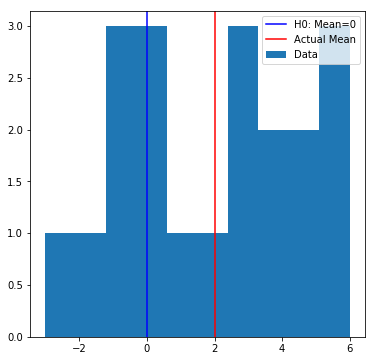

In [101]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(sample, label='Data')
ax.axvline(0, c='blue', label='H0: Mean=0')
ax.axvline(np.mean(sample), c='red', label='Actual Mean')
ax.legend(loc='best')

Get the 2% rejection range.

In [102]:
df = 19

crit1, crit2 = stats.t.ppf([1 - 0.01, 0.01], df)
print(crit1, crit2)

x_rej1 = np.linspace(stats.t.ppf(0.001, df), crit2, 20)
x_rej2 = np.linspace(crit1, stats.t.ppf(0.999, df), 20)

2.539483190622288 -2.5394831906222888


We plot the T distribution appropriate for our sample size, the acceptance / rejection regions, and our observed value

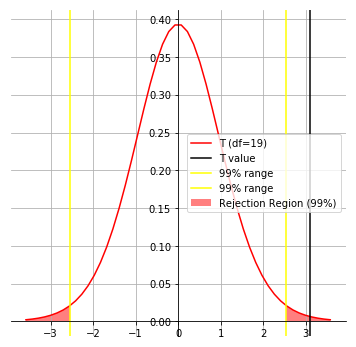

In [103]:
fig, ax = plt.subplots(figsize=(6, 6))

x = np.linspace(
    stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 50
)

ax.plot(x, stats.t.pdf(x, df), 'r-', label=f'T (df={df})')


ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(t_value, c='black', label='T value')
ax.axvline(crit1, c='yellow', label='99% range')
ax.axvline(crit2, c='yellow', label='99% range')

ax.fill_between(
    x_rej1,
    0,
    stats.t.pdf(x_rej1, df),
    facecolor='red',
    label='Rejection Region (99%)',
    alpha=0.5,
)
ax.fill_between(
    x_rej2,
    0,
    stats.t.pdf(x_rej2, df),
    facecolor='red',
    alpha=0.5,
)
ax.grid()

ax.legend(loc='right')

In [104]:
stats.t.ppf([0.975, 0.025], df)

array([ 2.09302405, -2.09302405])

----
### Analysis of Calcium Data

Back to our treatment / placebo data.  After calculating the T statistic manually to make sure we understand the mechanics, we use the ```stats.ttest_ind()``` method to compare two samples.  In this case, we see that under the Null Hypothesis (treatment = placebo), we would see our T value about 1 in 10  times.  Thus we can't reject H0 at the 5% level.  We plot the results to show the value we see falls in the Accept H0 region.


In [105]:
treatment = cal[cal['Treatment'] == 'Calcium']['Decrease']
placebo = cal[cal['Treatment'] == 'Placebo']['Decrease']
l_treatment = len(treatment)
l_placebo = len(placebo)

print(
    f'Number of treatments: {l_treatment}, number of placebos: {l_placebo}'
)

Number of treatments: 10, number of placebos: 11


In [106]:
t_mean = treatment.mean()
p_mean = placebo.mean()

t_std = np.std(treatment, ddof=1)
p_std = np.std(placebo, ddof=1)

ss2 = (l_treatment - 1) * t_std ** 2 + (
    l_placebo - 1
) * p_std ** 2

In [107]:
mean_ss2 = ss2 / (l_treatment + l_placebo - 2)

In [108]:
t_value = (t_mean - p_mean) / (
    math.sqrt(mean_ss2)
    * math.sqrt(1 / l_treatment + 1 / l_placebo)
)

In [109]:
print(t_mean, p_mean, t_value)

5.0 -0.2727272727272727 1.6341082415908594


In [110]:
stats.ttest_ind(treatment, placebo, equal_var=True)

Ttest_indResult(statistic=1.6341082415908594, pvalue=0.11869682666685942)

Get 5% Accept / Reject range

In [111]:
df = 19
crit1, crit2 = stats.t.ppf([1 - 0.025, 0.025], df)
print(crit1, crit2)

2.093024054408263 -2.0930240544082634


Graph the results

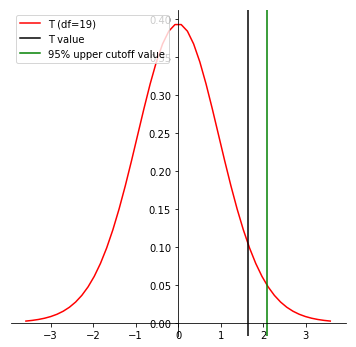

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))

df = 19
x = np.linspace(
    stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 50
)

ax.plot(x, stats.t.pdf(x, df), 'r-', label=f'T (df={df})')


ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(t_value, c='black', label='T value')
ax.axvline(crit1, c='green', label='95% upper cutoff value')
ax.legend(loc='upper left')

In [113]:
stats.ttest_ind(treatment, placebo, equal_var=False)

Ttest_indResult(statistic=1.6037172876755148, pvalue=0.12883936962193396)

### Regression Model

We can try to fit (by OLS) a linear model to our data: again we find that the data we see, would be seen about 1 time 10, assuming H0.  I presume that a researcher who believed in the treatment, would try again with a larger sample size

In [114]:
res = ols(formula='Decrease ~ Treatment', data=cal).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Decrease   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.670
Date:                Wed, 18 Mar 2020   Prob (F-statistic):              0.119
Time:                        16:12:23   Log-Likelihood:                -70.735
No. Observations:                  21   AIC:                             145.5
Df Residuals:                      19   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0000 

Display the residual errors for our model.  This illustrates how much noise there is in the data.

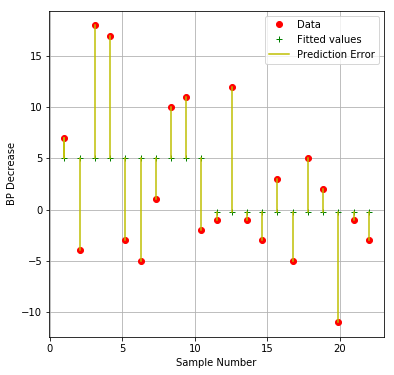

In [115]:
x_index = np.linspace(
    1, len(res.fittedvalues) + 1, len(res.fittedvalues)
)
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_index, cal['Decrease'], 'ro', label='Data')
ax.plot(
    x_index, res.fittedvalues, 'g+', label='Fitted values'
)

# we many residual lines, but only label 1 for the legend
# do all residual error lines
for x, y1, y2 in zip(
    x_index, cal['Decrease'], res.fittedvalues
):
    ax.plot([x, x], [y1, y2], 'y-')
# end for

# label the first error line, then bail
for x, y1, y2 in zip(
    x_index, cal['Decrease'], res.fittedvalues
):
    ax.plot(
        [x, x], [y1, y2], 'y-', label='Prediction Error'
    )
    break
# end for

ax.grid()
ax.set_xlabel('Sample Number')
ax.set_ylabel('BP Decrease')
ax.legend(loc='best')


---------
## Reproducibility

In [116]:
%watermark -h -iv
%watermark

seaborn     0.9.0
scipy       1.1.0
matplotlib  3.0.2
pandas      1.0.0
statsmodels 0.9.0
numpy       1.15.4
host name: DESKTOP-SODFUN6
2020-03-18T16:12:24+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
